In [157]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt

#warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = (7,5)

In [182]:
books_df = pd.read_csv('Books.csv', sep=';', encoding='latin-1')
ratings_df = pd.read_csv('Ratings.csv',sep=';', encoding='latin-1')

### Cleaning our dataset
- Removing 0 rating from our dataset
- Matching userId column name to the other columns naming pattern
- Merging rating and book dataset

In [183]:
ratings_df = ratings_df[ratings_df['Rating'] != 0]
ratings_df.rename(columns={'User-ID': 'UserId'}, inplace=True)
books_rating_df = ratings.merge(books, on='ISBN')

### Size of our dataset
- Rating dataset size
- Book dataset size
- book-rating dataset size

In [184]:
print(f'Our Rating data set has {ratings_df.shape[0]} row and {ratings_df.shape[1]} column')
print(f'Our Book data set has {books_df.shape[0]} row and {books_df.shape[1]} column')
print(f'Our Book-Rating data set has {books_rating_df.shape[0]} row and {books_rating_df.shape[1]} column')

Our Rating data set has 433671 row and 3 column
Our Book data set has 271379 row and 5 column
Our Book-Rating data set has 1031187 row and 7 column


### Insights of our datasets
- Columns
- Number of missing and NAN values
- Datatyps of columns

In [185]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433671 entries, 1 to 1149779
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   UserId  433671 non-null  int64 
 1   ISBN    433671 non-null  object
 2   Rating  433671 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 13.2+ MB


In [186]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271379 non-null  object
 1   Title      271379 non-null  object
 2   Author     271377 non-null  object
 3   Year       271379 non-null  int64 
 4   Publisher  271377 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


### General numeric information about our dataset
- Total number of unique book
- Total number of non-zero rating
- Total number of unique users
- Average rating per book
- Average rating per user

In [187]:
books_count = books_df.shape[0]
ratings_count = ratings_df.shape[0]
users_count = ratings_df['UserId'].nunique()
avg_rating_per_book = round(ratings_count / books_count, 2)
avg_rating_per_user = round(ratings_count / users_count, 2) 

print(f'There are total {books_count} unique books in this data set.')
print(f'There are total {ratings_count} None-Zero unique ratings in this data set.')
print(f'There are total {users_count} unique user that rated books in this data set.')
print(f'Average rating per book is {avg_rating_per_book} in this data set.')
print(f'Average rating per user is {avg_rating_per_user} in this data set.')


There are total 271379 unique books in this data set.
There are total 433671 None-Zero unique ratings in this data set.
There are total 77805 unique user that rated books in this data set.
Average rating per book is 1.6 in this data set.
Average rating per user is 5.57 in this data set.


### Count Plot of our ratings
We want to see the distribution of ratings to determine if data set is valid for making recommendation model or not and since our data is distrubuted nicely, we can assume our data is valid for making recommendation model

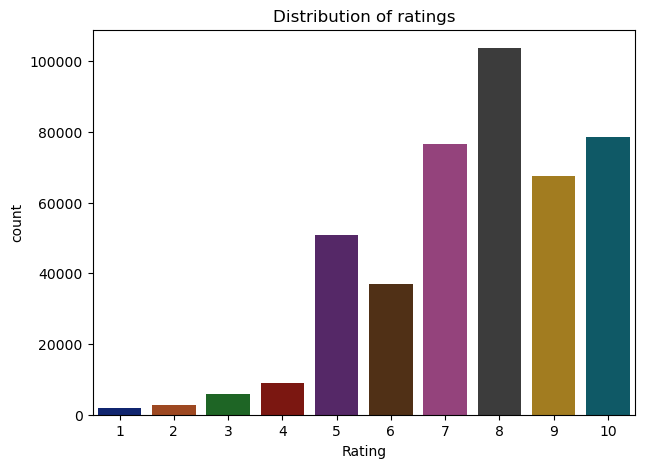

In [188]:
sns.countplot(ratings_df, x='Rating', palette='dark')
plt.title('Distribution of ratings')
plt.show()

### EDA
- Highest average rated books 
- Lowest avrage rated books
- Highest average rated publishers
- Lowest average rated publishers

all of the avrage function will be based on the Bayesian Avrage.

In [219]:
book_stat = ratings_df.groupby('ISBN')['Rating'].agg(['count','mean'])
C = book_stat['count'].mean()
M = book_stat['mean'].mean()

def bayesian_avg(ratings):
    bayesian_avg = (C*M+ratings.sum())/(C+ratings.count())
    return round(bayesian_avg, 3)

bayesian_rated_avg_books = ratings_df.groupby('ISBN')['Rating'].agg(bayesian_avg).reset_index()

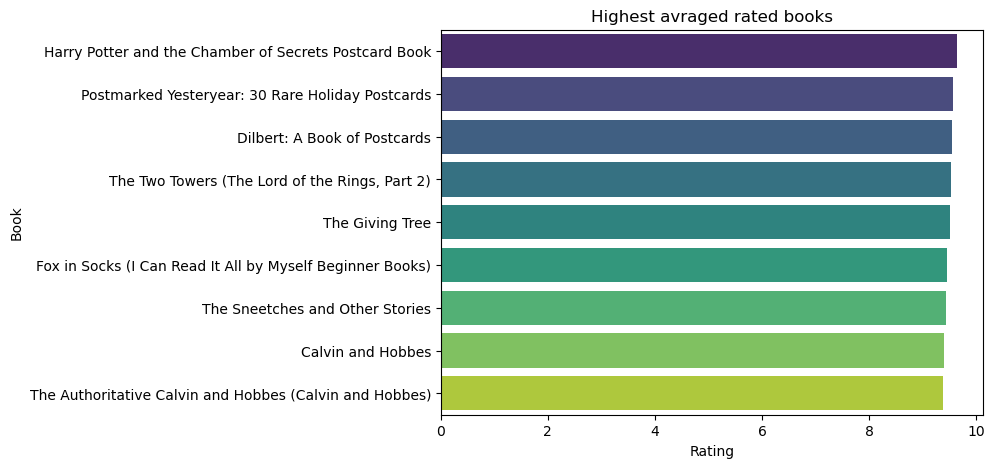

In [237]:
highest_avrage_rated_books = bayesian_rated_avg_books.sort_values(by='Rating',ascending=False)[0:10]
highest_avrage_rated_books = highest_avrage_rated_books.merge(books_df[['ISBN', 'Title']], on='ISBN')

sns.barplot(data=highest_avrage_rated_books, y='Title', x='Rating', palette='viridis')
plt.title('Highest avraged rated books')
plt.ylabel('Book')
plt.show()

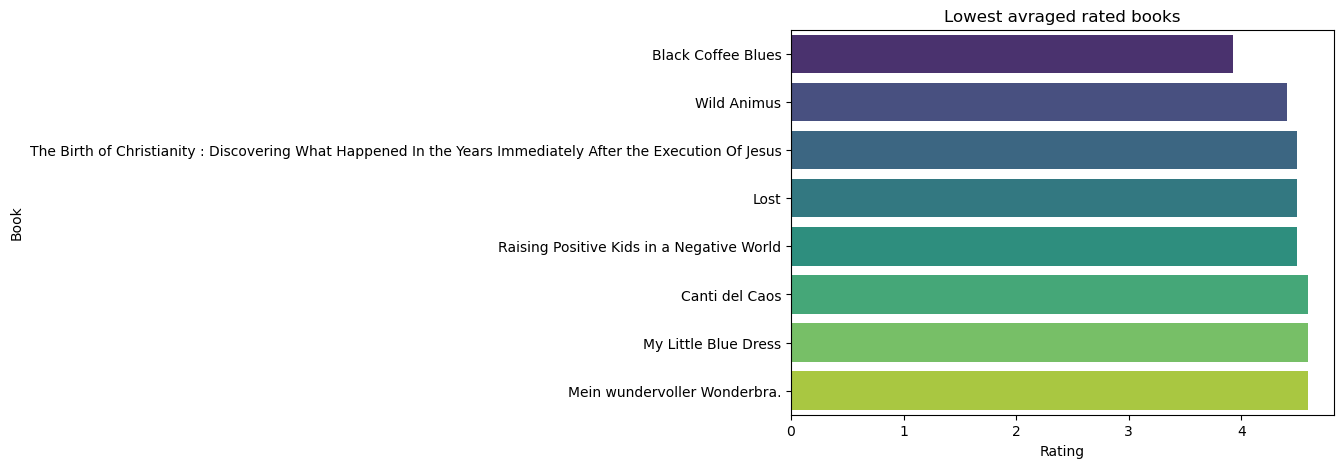

In [239]:
lowest_avrage_rated_books = bayesian_rated_avg_books.sort_values(by='Rating',ascending=True)[0:10]
lowest_avrage_rated_books = lowest_avrage_rated_books.merge(books_df[['ISBN', 'Title']], on='ISBN')

sns.barplot(data=lowest_avrage_rated_books, y='Title', x='Rating', palette='viridis')
plt.title('Lowest avraged rated books')
plt.ylabel('Book')
plt.show()

In [240]:
bayesian_rated_avg_publisher = books_rating_df.groupby('Publisher')['Rating'].agg(bayesian_avg).reset_index()

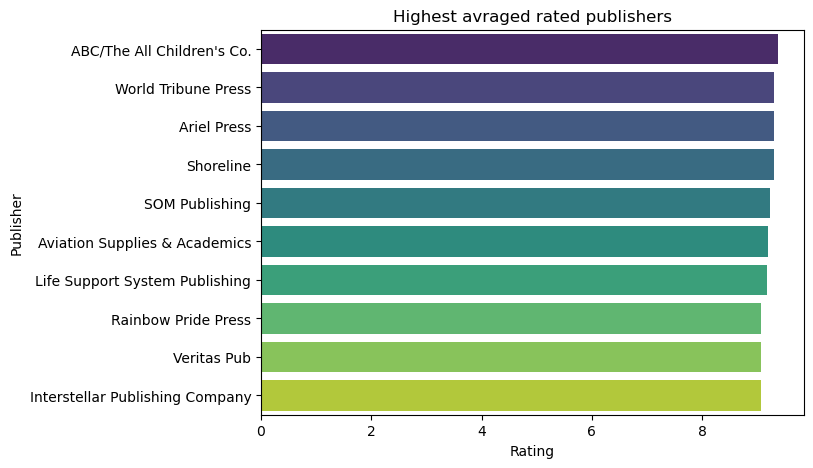

In [242]:
highest_avrage_rated_publishers = bayesian_rated_avg_publisher.sort_values(by='Rating',ascending=False)[0:10]

sns.barplot(data=highest_avrage_rated_publishers, y='Publisher', x='Rating', palette='viridis')
plt.title('Highest avraged rated publishers')
plt.show()

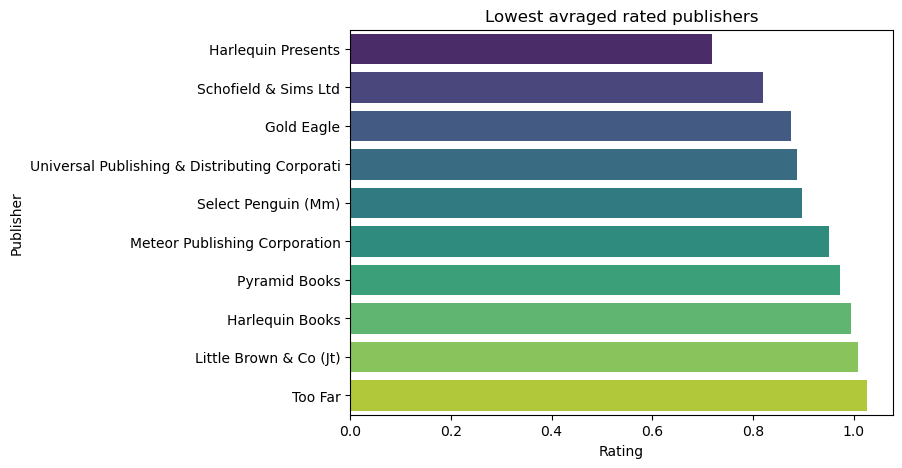

In [243]:
lowest_avrage_rated_publishers = bayesian_rated_avg_publisher.sort_values(by='Rating',ascending=True)[0:10]

sns.barplot(data=lowest_avrage_rated_publishers, y='Publisher', x='Rating', palette='viridis')
plt.title('Lowest avraged rated publishers')
plt.show()